## Calculating metrics from saved weights

In [2]:
from arch import all_models

model_names = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'densenet121', 'densenet161', 'densenet201', 'vgg16', 'ensemble']
for m in model_names:
    bs = 64
    dls = get_covid_dls(bs, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
    hp = {**DEFAULT_HP, 'model_name': f'{m}_224_{0}', 'epochs': 5, 'wd':0.001}
    trainer = Trainer('report_all_2', m, dls, hp, weights=None, sched=True)
    trainer.load_weights(f"{m}_224_0.pkl")
    trainer.validate()
    trainer.test()
    trainer._write_hp()

  0%|          | 0/11 [00:00<?, ?it/s]
epoch val info: loss:0.16793937981128693, acc:0.934402332361516
100%|██████████| 11/11 [00:12<00:00,  1.18s/it]

epoch test info: loss:0.2127748429775238, acc:0.9269005847953217
all_recall [0.95862069 0.96296296 0.89298893]
f1_score 0.9343948865634509
weighted_recall 0.934402332361516
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
all_recall [0.95205479 0.96197719 0.88      ]
f1_score 0.9270230688860315
weighted_recall 0.9269005847953217
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recomm

#### Tracking training

In [2]:
i = 1
model = 'densenet121'
bs = 16
dls = get_covid_dls(bs, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_{i}', 'epochs': 5, 'wd':0.001}
trainer = Trainer('report_model_comparisons', model, dls, hp, weights=None, sched=True)
# trainer.one_cycle()

  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.2603747546672821, acc:0.9032571706368497
100%|██████████| 43/43 [00:13<00:00,  3.29it/s]

epoch val info: loss:0.41215816140174866, acc:0.89067055393586
  0%|          | 0/43 [00:00<?, ?it/s]

epoch trng info: loss:0.16883885860443115, acc:0.9474963539134662
100%|██████████| 43/43 [00:13<00:00,  3.27it/s]

epoch val info: loss:0.140883669257164, acc:0.9431486880466472
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.10372669249773026, acc:0.9654837141468158
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:0.14288944005966187, acc:0.9431486880466472
epoch number: 3
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.061275631189346313, acc:0.9795819154107924
100%|██████████| 43/43 [00:12<00:00,  3.32it/s]

epoch val info: loss:0.12573429942131042, acc:0.9533527696793003
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.07395574450492859, acc:0.977637335926106
  0%|          |

all_recall [0.9862069  0.97037037 0.90405904]
f1_score 0.9474245661169169
weighted_recall 0.9475218658892128
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


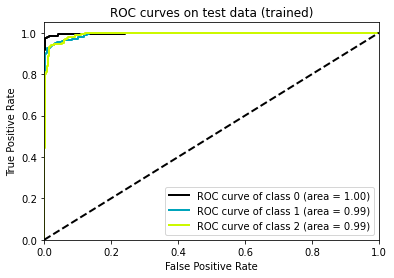

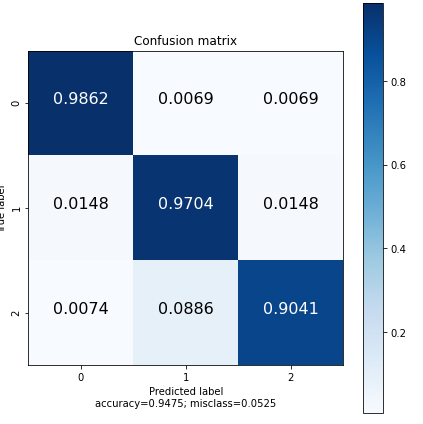

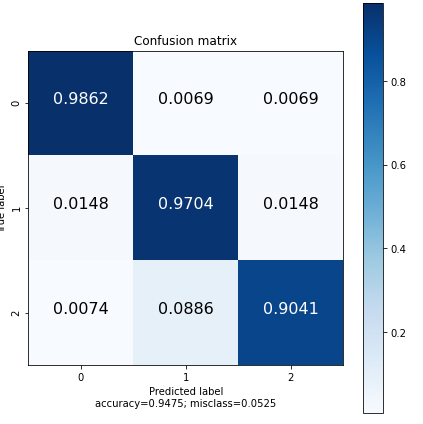

In [3]:
trainer.cms[1] = None
preds, labels = trainer.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer.cms[1], trainer.class_names)

all_recall [0.98630137 0.98098859 0.87272727]
f1_score 0.9383813711375371
weighted_recall 0.9385964912280702
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


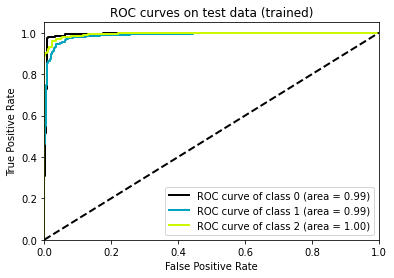

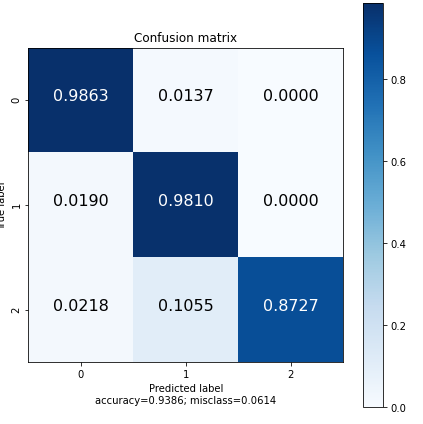

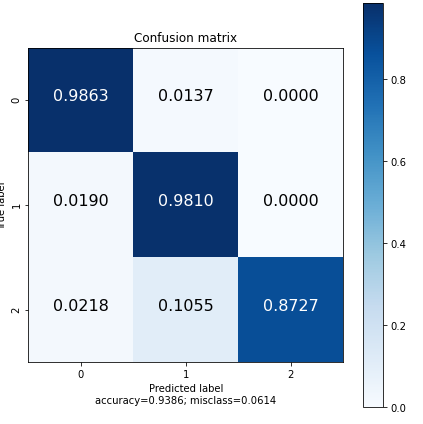

In [4]:
trainer.cms[2] = None
preds, labels = trainer.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer.cms[2], trainer.class_names)

In [4]:
i = 1
model = 'resnet34'
bs = 64
dls = get_covid_dls(bs, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_{i}', 'epochs': 5, 'wd':0.001}
trainer = Trainer('report_all', model, dls, hp, weights=None, sched=True)
trainer.one_cycle()

  0%|          | 0/11 [00:00<?, ?it/s]
epoch trng info: loss:0.34187448024749756, acc:0.8711716091395236
  0%|          | 0/33 [00:00<?, ?it/s]
epoch val info: loss:0.21769346296787262, acc:0.9212827988338192
epoch number: 1
  0%|          | 0/11 [00:00<?, ?it/s]
epoch trng info: loss:0.11907472461462021, acc:0.9645114244044726
  0%|          | 0/33 [00:00<?, ?it/s]
epoch val info: loss:0.19975484907627106, acc:0.9358600583090378
epoch number: 2
  0%|          | 0/11 [00:00<?, ?it/s]
epoch trng info: loss:0.11036287248134613, acc:0.9649975692756442
  0%|          | 0/33 [00:00<?, ?it/s]
epoch val info: loss:0.17638501524925232, acc:0.9460641399416909
epoch number: 3
  0%|          | 0/11 [00:00<?, ?it/s]
epoch trng info: loss:0.0816037505865097, acc:0.9737481769567331
100%|██████████| 11/11 [00:14<00:00,  1.30s/it]

epoch val info: loss:0.14877252280712128, acc:0.9504373177842566
  0%|          | 0/11 [00:00<?, ?it/s]

epoch trng info: loss:0.07150325179100037, acc:0.977637335926106
  

In [1]:
from data.utils import to_dataloader, split, get_covid_dls
from data.xray_dataset import DEFAULT_TRANSFORMS, IMAGENET_NORMALIZE
import torchvision
from torchvision import transforms
from torch.utils.data.dataset import random_split
import torch
import pandas as pd
import os 
import matplotlib.pyplot as plt
from data.utils import plot_roc, plot_confusion_matrix, SEED
import numpy as np
import random 

from main import *
from utils import all_loss, all_opt
import torchvision.models as models
import seaborn as sns
torch.manual_seed(SEED)
ROOT_DIR = '../data/10_all_data_foldered/'
DATA_DIR = '../data/10_all_data_foldered/images'
IMG_DIR = DATA_DIR
tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((300, 300)),
    transforms.RandomCrop((224, 224)),
    # transforms.RandomHorizontalFlip(0.1),
    # transforms.RandomRotation(5),
    # transforms.ColorJitter(0.1, 0.1, 0, 0),
    ])

# pytorch from ImageFolder
# ds = torchvision.datasets.ImageFolder(DATA_DIR, transform=tfms)
# train, val = int(len(ds) *0.6), int(len(ds) *0.2)
# test = len(ds) - train - val
# datasets =  random_split(ds, [train, val, test])
df = pd.read_csv(os.path.join(ROOT_DIR, 'data.csv'))
no_ct = pd.read_csv(os.path.join(ROOT_DIR, 'no_ct.csv'))
i = 4

<AxesSubplot:title={'center':'Train subset distribution'}, xlabel='label', ylabel='Count'>

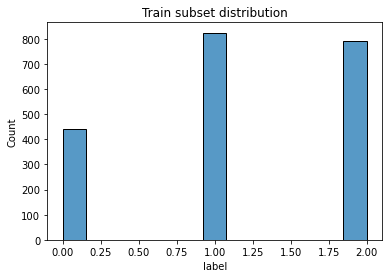

In [10]:
plt.title('Train subset distribution')

sns.histplot(no_ct[no_ct['phase'] == 'train']['label'])

In [2]:
## Model weights
model = 'densenet161'
dls = get_covid_dls(16, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_{i}', 'wd':0, 'epochs': 5}
trainer = Trainer('report', model, dls, hp, weights=None, sched=True)

In [3]:
trainer.one_cycle()

  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.39199575781822205, acc:0.8624210014584346
100%|██████████| 43/43 [00:13<00:00,  3.15it/s]

epoch val info: loss:0.8400288224220276, acc:0.8002915451895044
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.20651774108409882, acc:0.929022848808945
100%|██████████| 43/43 [00:13<00:00,  3.17it/s]

epoch val info: loss:0.4030017852783203, acc:0.9081632653061225
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.10211719572544098, acc:0.9669421487603306
100%|██████████| 43/43 [00:14<00:00,  3.03it/s]

epoch val info: loss:0.2537849247455597, acc:0.924198250728863
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.11854992061853409, acc:0.9649975692756442
100%|██████████| 43/43 [00:13<00:00,  3.13it/s]

epoch val info: loss:0.2034309357404709, acc:0.934402332361516
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.09845109283924103, acc:0.9684005833738454
100%|██████████| 43/43 [00

all_recall [0.9862069  0.83333333 0.98892989]
f1_score 0.9264973871332494
weighted_recall 0.9271137026239067
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


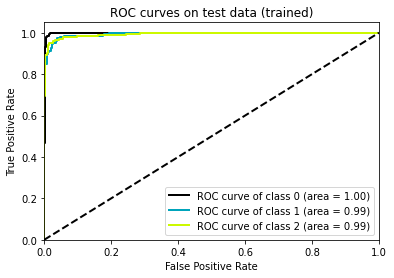

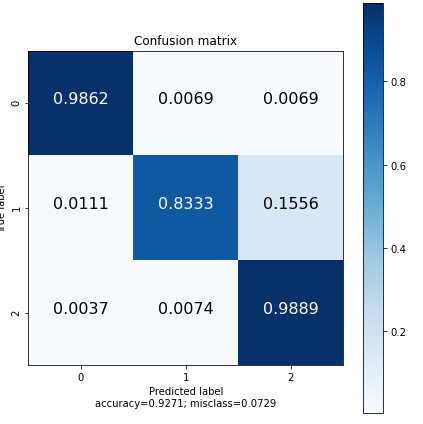

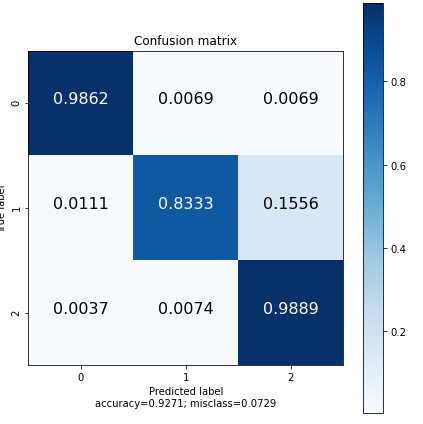

In [13]:
trainer.cms[1] = None
preds, labels = trainer.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer.cms[1], trainer.class_names)

all_recall [0.98630137 0.81749049 0.98545455]
f1_score 0.9200544171552201
weighted_recall 0.9210526315789473
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


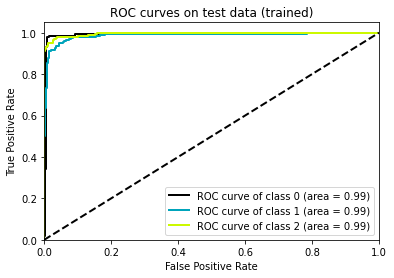

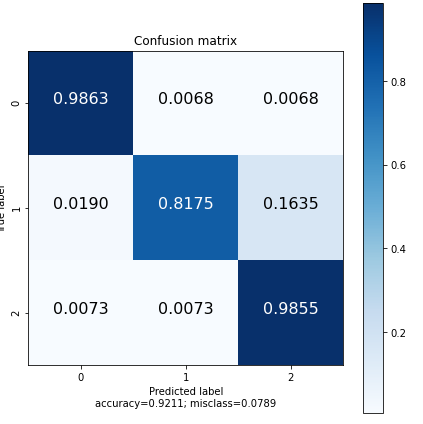

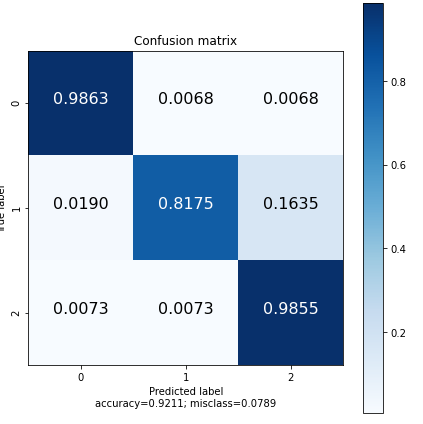

In [14]:
trainer.cms[2] = None
preds, labels = trainer.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer.cms[2], trainer.class_names)

In [2]:
## Model weights
model = 'densenet161'
dls = get_covid_dls(16, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_reg_{i}', 'epochs':5, 'wd':0.001}
trainer2 = Trainer('report', model, dls, hp, weights=None, sched=True)

In [3]:
trainer2.one_cycle()

  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.2974145710468292, acc:0.8983957219251337
100%|██████████| 43/43 [00:14<00:00,  2.98it/s]

epoch val info: loss:0.3620006740093231, acc:0.8965014577259475
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.1373138129711151, acc:0.9562469615945551
100%|██████████| 43/43 [00:14<00:00,  3.05it/s]

epoch val info: loss:0.19352459907531738, acc:0.9416909620991254
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.07329341769218445, acc:0.9771511910549344
100%|██████████| 43/43 [00:14<00:00,  3.02it/s]

epoch val info: loss:0.14372162520885468, acc:0.9518950437317785
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.08123371005058289, acc:0.9766650461837627
100%|██████████| 43/43 [00:13<00:00,  3.08it/s]

epoch val info: loss:0.11030396819114685, acc:0.9606413994169096
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.060993343591690063, acc:0.9790957705396208
  0%|          | 0/43

all_recall [0.9862069  0.96666667 0.94464945]
f1_score 0.9621046071351752
weighted_recall 0.9620991253644315
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


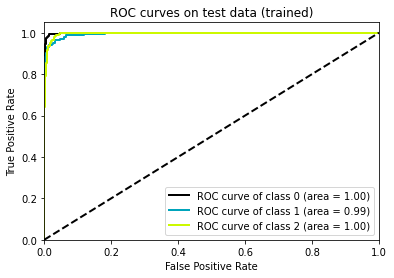

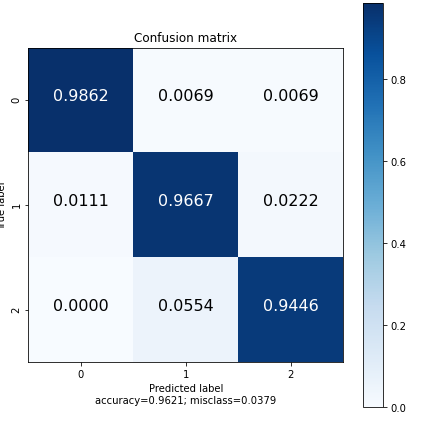

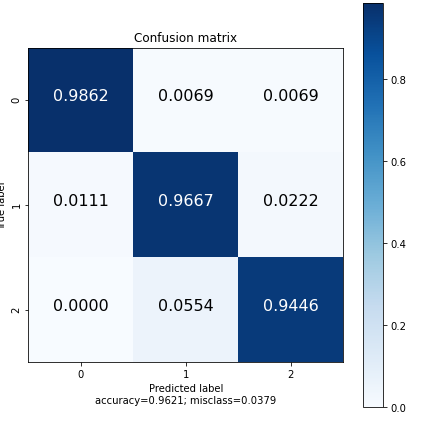

In [17]:
trainer2.cms[1] = None
preds, labels = trainer2.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer2.cms[1], trainer2.class_names)

all_recall [0.98630137 0.95437262 0.95636364]
f1_score 0.9619886140861998
weighted_recall 0.9619883040935673
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


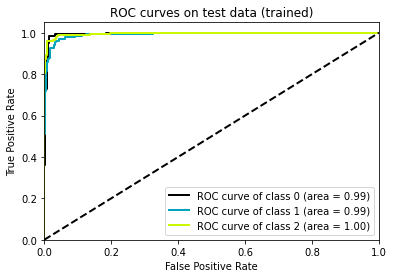

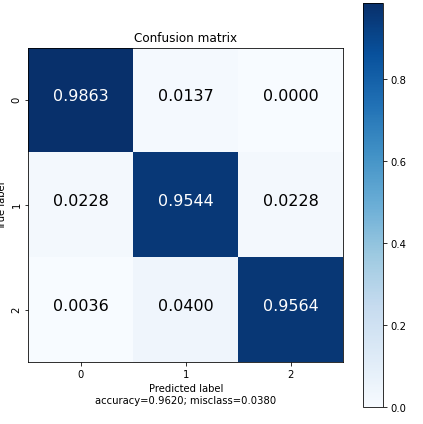

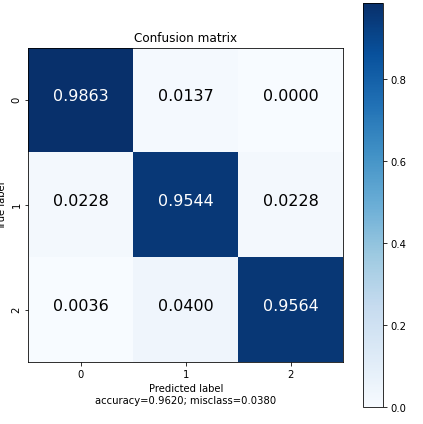

In [18]:
trainer2.cms[2] = None
preds, labels = trainer2.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer2.cms[2], trainer2.class_names)

In [2]:
## Model weights
model = 'vgg16'
dls = get_covid_dls(16, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_reg_{i}', 'epochs':5, 'wd':0.001}
trainer3 = Trainer('report', model, dls, hp, weights=None, sched=True)

In [3]:
trainer3.one_cycle()

  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.34731096029281616, acc:0.8765192027224112
100%|██████████| 43/43 [00:13<00:00,  3.09it/s]

epoch val info: loss:0.17832694947719574, acc:0.9460641399416909
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.1846967339515686, acc:0.9402041808458921
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:0.2612651586532593, acc:0.9139941690962099
epoch number: 2
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.07299469411373138, acc:0.9771511910549344
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:0.19849750399589539, acc:0.9314868804664723
epoch number: 3
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.07710916548967361, acc:0.9795819154107924
100%|██████████| 43/43 [00:14<00:00,  2.92it/s]

epoch val info: loss:0.16381020843982697, acc:0.9402332361516035
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.08890154957771301, acc:0.980068060281964
  0%|   

In [4]:
## Model weights
model = 'resnet18'
dls = get_covid_dls(128, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_reg_{i}', 'epochs':5, 'wd':0.001}
trainer4 = Trainer('report', model, dls, hp, weights=None, sched=True)

In [5]:
trainer4.one_cycle()

  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.5680958032608032, acc:0.768595041322314
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.3453819751739502, acc:0.8819241982507289
epoch number: 1
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.16260671615600586, acc:0.9460379192999514
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.16560953855514526, acc:0.934402332361516
epoch number: 2
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.13399650156497955, acc:0.9581915410792416
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.18927595019340515, acc:0.922740524781341
epoch number: 3
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.12895072996616364, acc:0.9669421487603306
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.20059768855571747, acc:0.924198250728863
epoch number: 4
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.1286994218826294, acc:0.9625668449197861
  0%|  

all_recall [0.93793103 0.97407407 0.8597786 ]
f1_score 0.9211985081028623
weighted_recall 0.9212827988338192
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


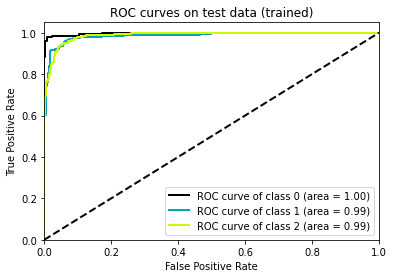

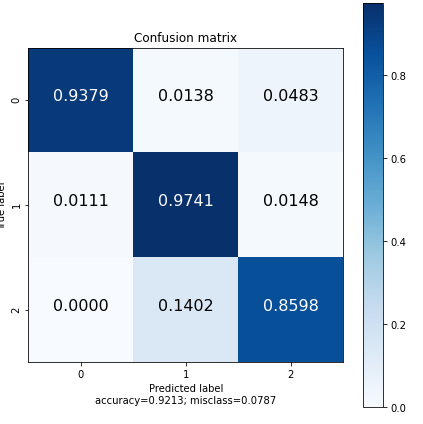

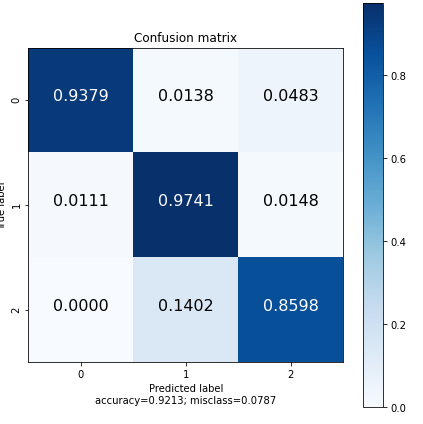

In [6]:
trainer4.cms[1] = None
preds, labels = trainer4.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer4.cms[1], trainer4.class_names)

all_recall [0.93793103 0.97407407 0.8597786 ]
f1_score 0.9211985081028623
weighted_recall 0.9212827988338192
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


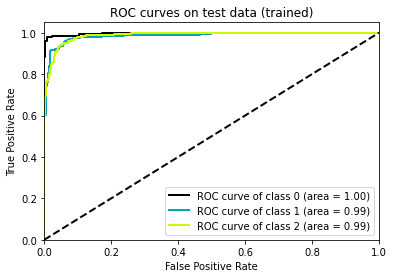

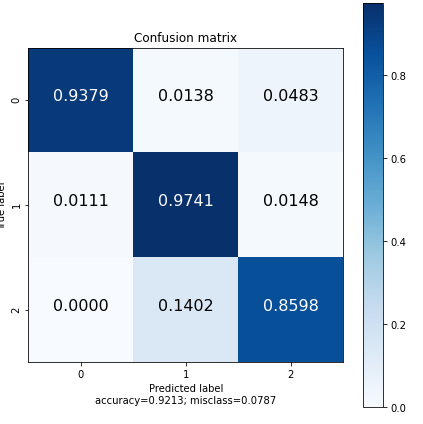

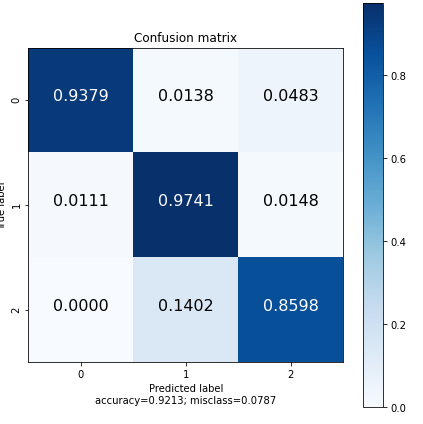

In [7]:
trainer4.cms[2] = None
preds, labels = trainer4.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer4.cms[2], trainer4.class_names)

## Ensemble trian

In [13]:
## Model weights
i=2
model = 'ensemble'
dls = get_covid_dls(128, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}2_224_{i}', 'wd':0}
trainer5 = Trainer('report_all', model, dls, hp, weights=None, sched=True)

In [14]:
trainer5.one_cycle()

  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.27575838565826416, acc:0.9120077783179388
100%|██████████| 6/6 [00:18<00:00,  3.12s/it]

epoch val info: loss:0.12797008454799652, acc:0.9460641399416909
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.05167180299758911, acc:0.9834710743801653
100%|██████████| 6/6 [00:18<00:00,  3.12s/it]

epoch val info: loss:0.12415414303541183, acc:0.9533527696793003
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.049720216542482376, acc:0.9878463782207098
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.12777966260910034, acc:0.9518950437317785
epoch number: 3
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.04750959947705269, acc:0.9854156538648517
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.1261545866727829, acc:0.9533527696793003
epoch number: 4
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.04348398745059967, acc:0.9868740884783666
  0%|          |

all_recall [0.97241379 0.97407407 0.93726937]
f1_score 0.9592686541790411
weighted_recall 0.9591836734693877
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


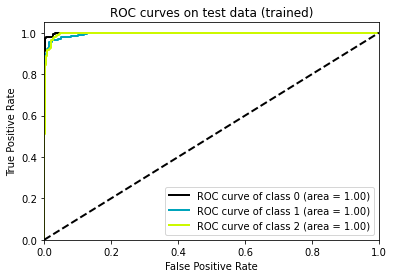

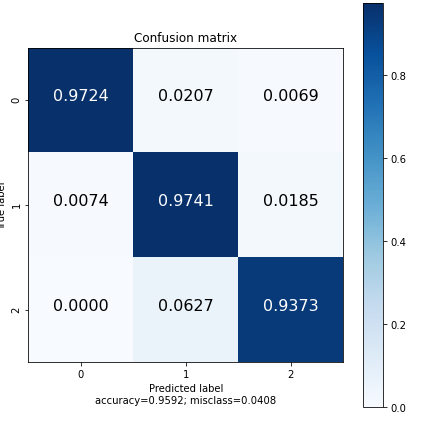

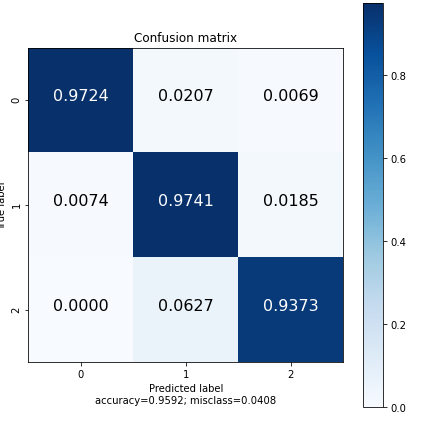

In [4]:
trainer5.cms[1] = None
preds, labels = trainer5.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer5.cms[1], trainer5.class_names)

all_recall [0.97945205 0.98479087 0.93454545]
f1_score 0.9635132499741274
weighted_recall 0.9634502923976608
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


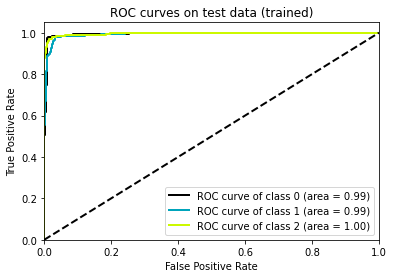

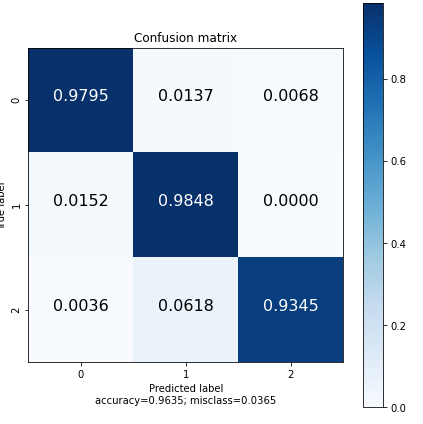

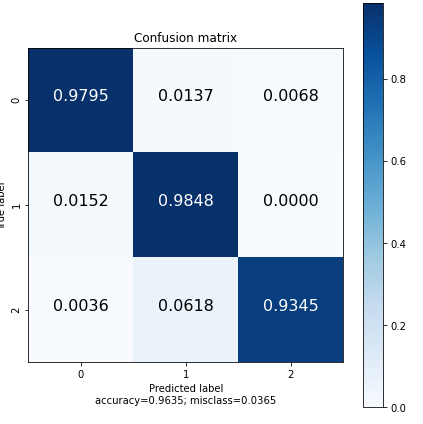

In [5]:
trainer5.cms[2] = None
preds, labels = trainer5.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer5.cms[2], trainer5.class_names)

In [6]:
## Model weights
model = 'ensemble'
dls = get_covid_dls(4, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_{i+1}', 'epochs': 5}
trainer5.train_dl, trainer5.val_dl, trainer5.test_dl = dls
trainer5.load_weights(f'{model}_224_{i}.pkl')
trainer5.model.unfreeze()
trainer5.one_cycle()

100%|██████████| 515/515 [02:58<00:00,  2.89it/s]

epoch trng info: loss:0.12855850160121918, acc:0.95770539620807
  0%|          | 0/515 [00:00<?, ?it/s]
epoch val info: loss:0.1704649180173874, acc:0.9416909620991254
epoch number: 1
100%|██████████| 515/515 [02:58<00:00,  2.89it/s]

epoch trng info: loss:0.10547976195812225, acc:0.964025279533301
  0%|          | 0/515 [00:00<?, ?it/s]
epoch val info: loss:0.1264403611421585, acc:0.9577259475218659
epoch number: 2
100%|██████████| 515/515 [02:56<00:00,  2.92it/s]

epoch trng info: loss:0.10134318470954895, acc:0.968886728245017
  0%|          | 0/515 [00:00<?, ?it/s]
epoch val info: loss:0.14795176684856415, acc:0.9504373177842566
epoch number: 3
100%|██████████| 515/515 [02:56<00:00,  2.92it/s]

epoch trng info: loss:0.11296108365058899, acc:0.966456003889159
  0%|          | 0/515 [00:00<?, ?it/s]
epoch val info: loss:0.13115856051445007, acc:0.9548104956268222
epoch number: 4
100%|██████████| 515/515 [02:56<00:00,  2.91it/s]

epoc

all_recall [0.97931034 0.97037037 0.93726937]
f1_score 0.9592051082986357
weighted_recall 0.9591836734693877
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


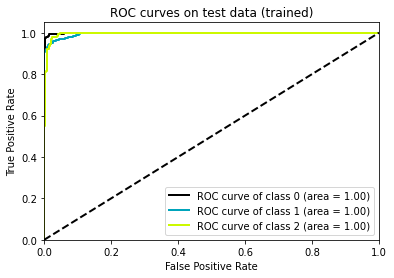

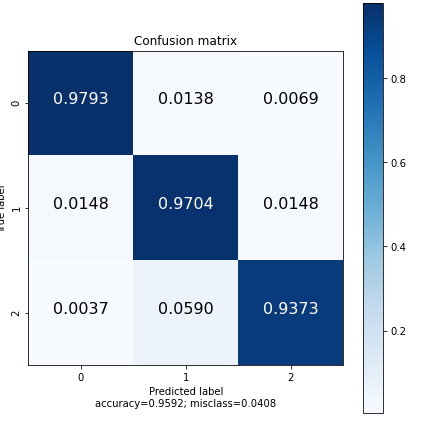

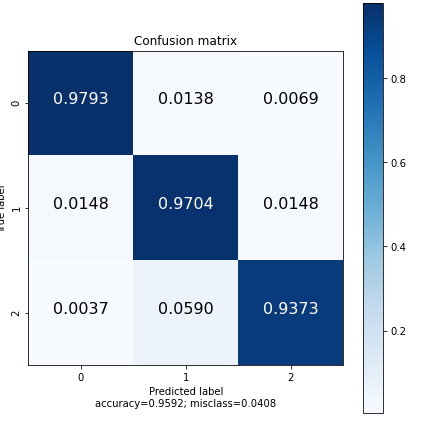

In [7]:
trainer5.cms[1] = None
preds, labels = trainer5.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer5.cms[1], trainer5.class_names)

all_recall [0.98630137 0.96577947 0.92727273]
f1_score 0.9546977010206597
weighted_recall 0.9546783625730995
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


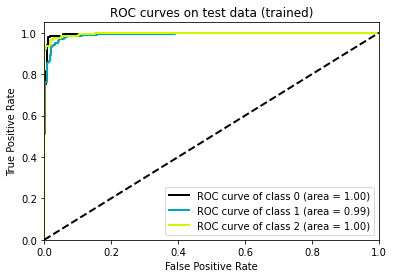

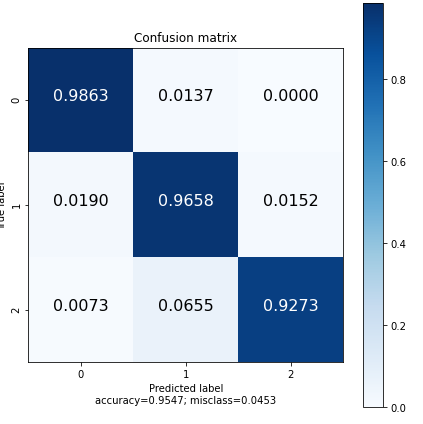

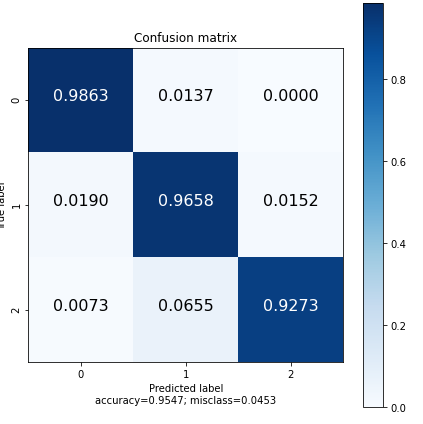

In [8]:
trainer5.cms[2] = None
preds, labels = trainer5.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer5.cms[2], trainer5.class_names)